<a href="https://colab.research.google.com/github/richierichijkl/Projects/blob/main/World_happiness_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/2019.csv")
df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.shape

(156, 9)

In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
features = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [ ]:
numeric_data = df[features]

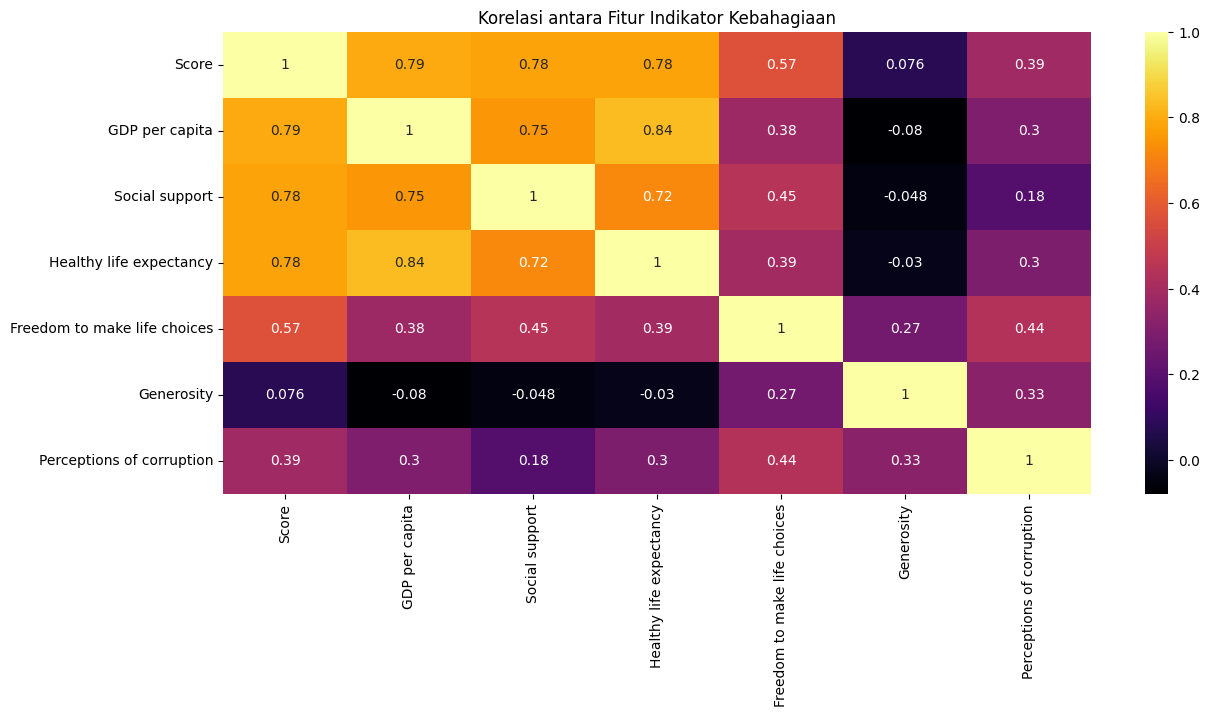

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(numeric_data.corr(method='pearson'), annot=True, cmap='inferno')
plt.title('Korelasi antara Fitur Indikator Kebahagiaan')
plt.show()

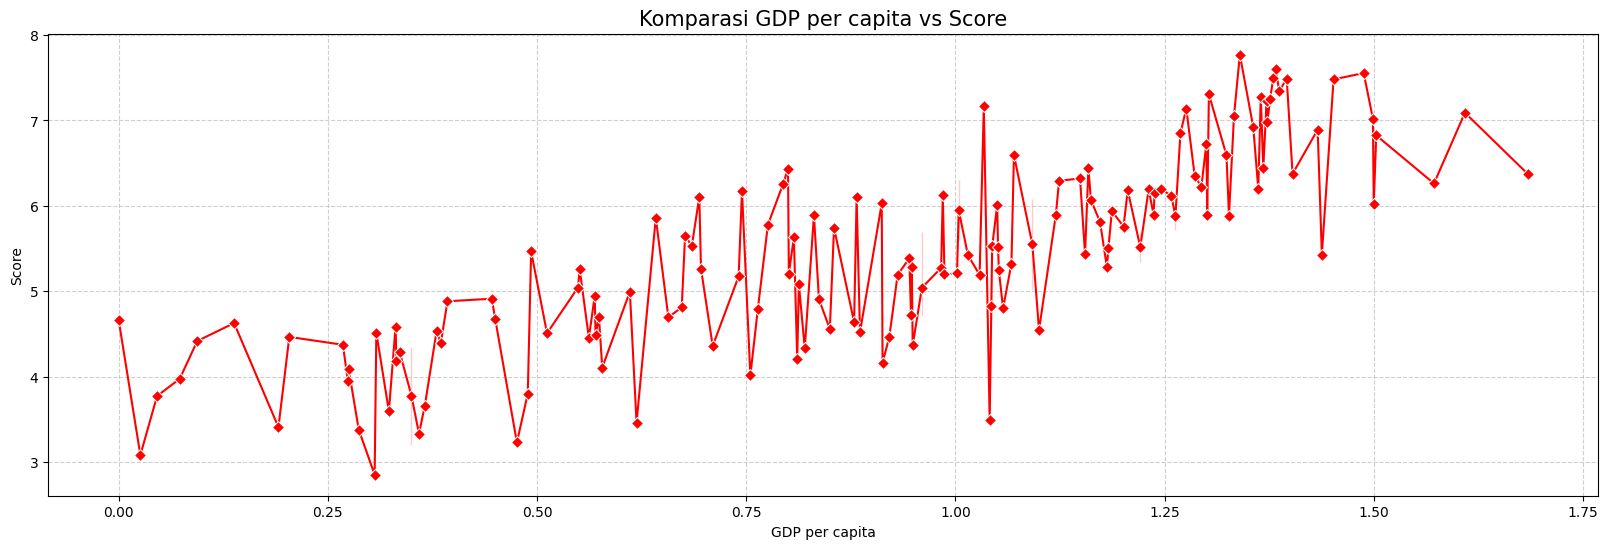

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df["GDP per capita"], y=df["Score"], marker='D', color='red', linestyle='-')

plt.title("Komparasi GDP per capita vs Score", size=15)
plt.xlabel("GDP per capita")
plt.ylabel("Score")

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

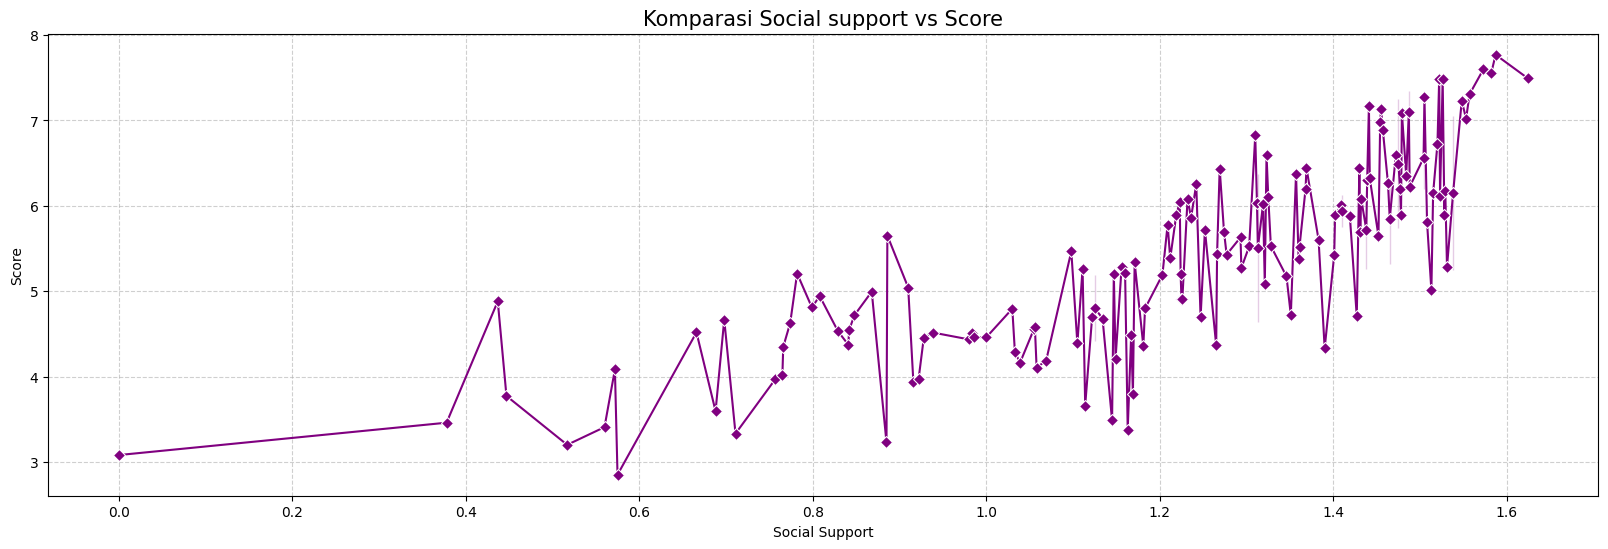

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df["Social support"], y=df["Score"], marker='D', color='purple', linestyle='-')

plt.title("Komparasi Social support vs Score", size=15)
plt.xlabel("Social Support")
plt.ylabel("Score")

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

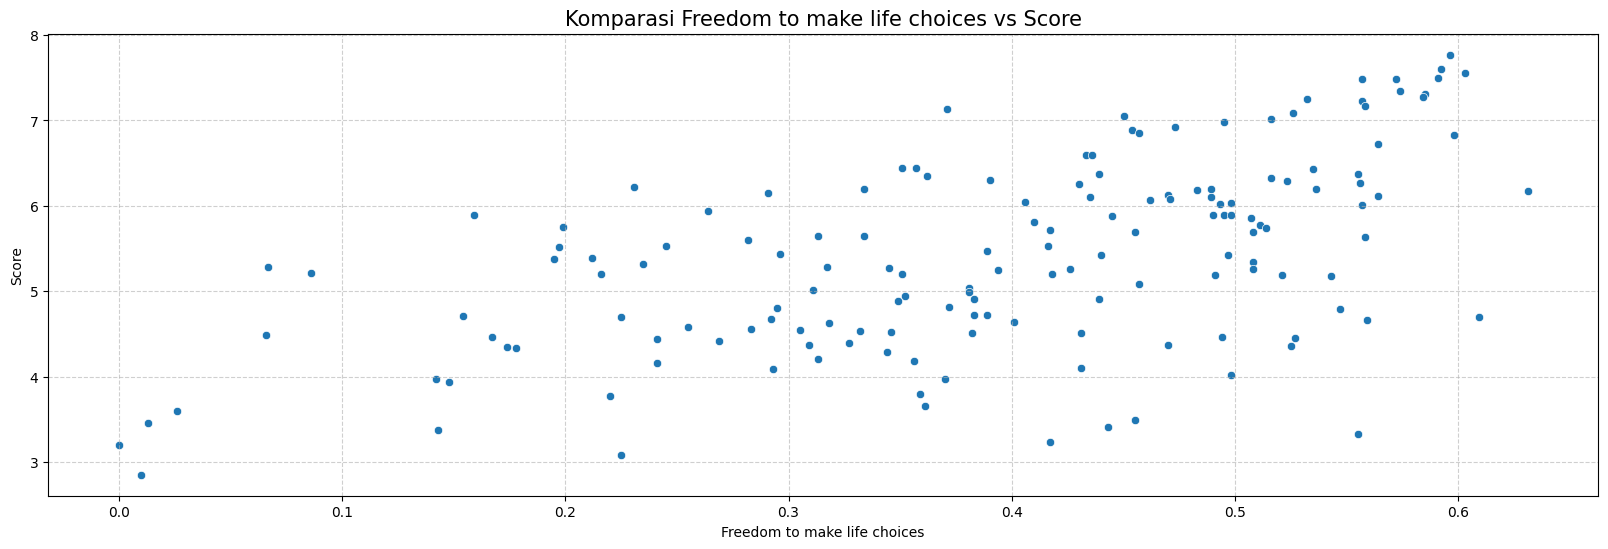

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Freedom to make life choices', y='Score', alpha=1)

plt.title('Komparasi Freedom to make life choices vs Score', size=15)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Score')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

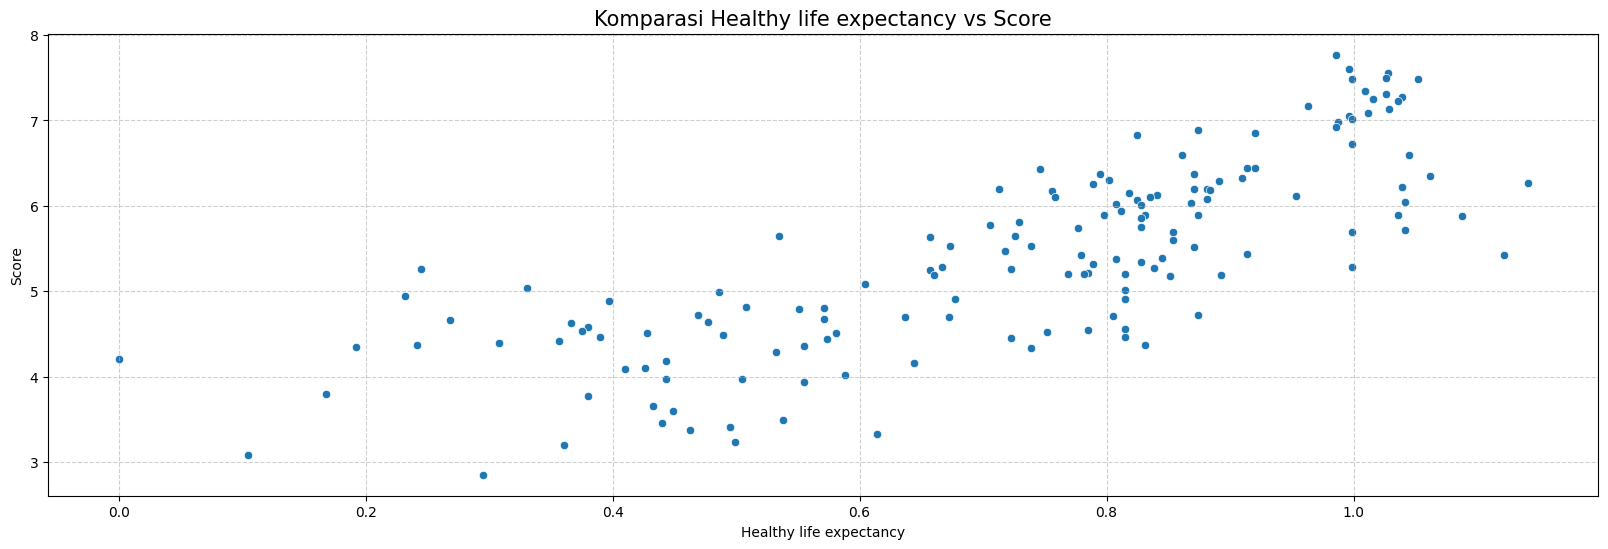

In [ ]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Healthy life expectancy', y='Score', alpha=1)

plt.title('Komparasi Healthy life expectancy vs Score', size=15)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Score')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

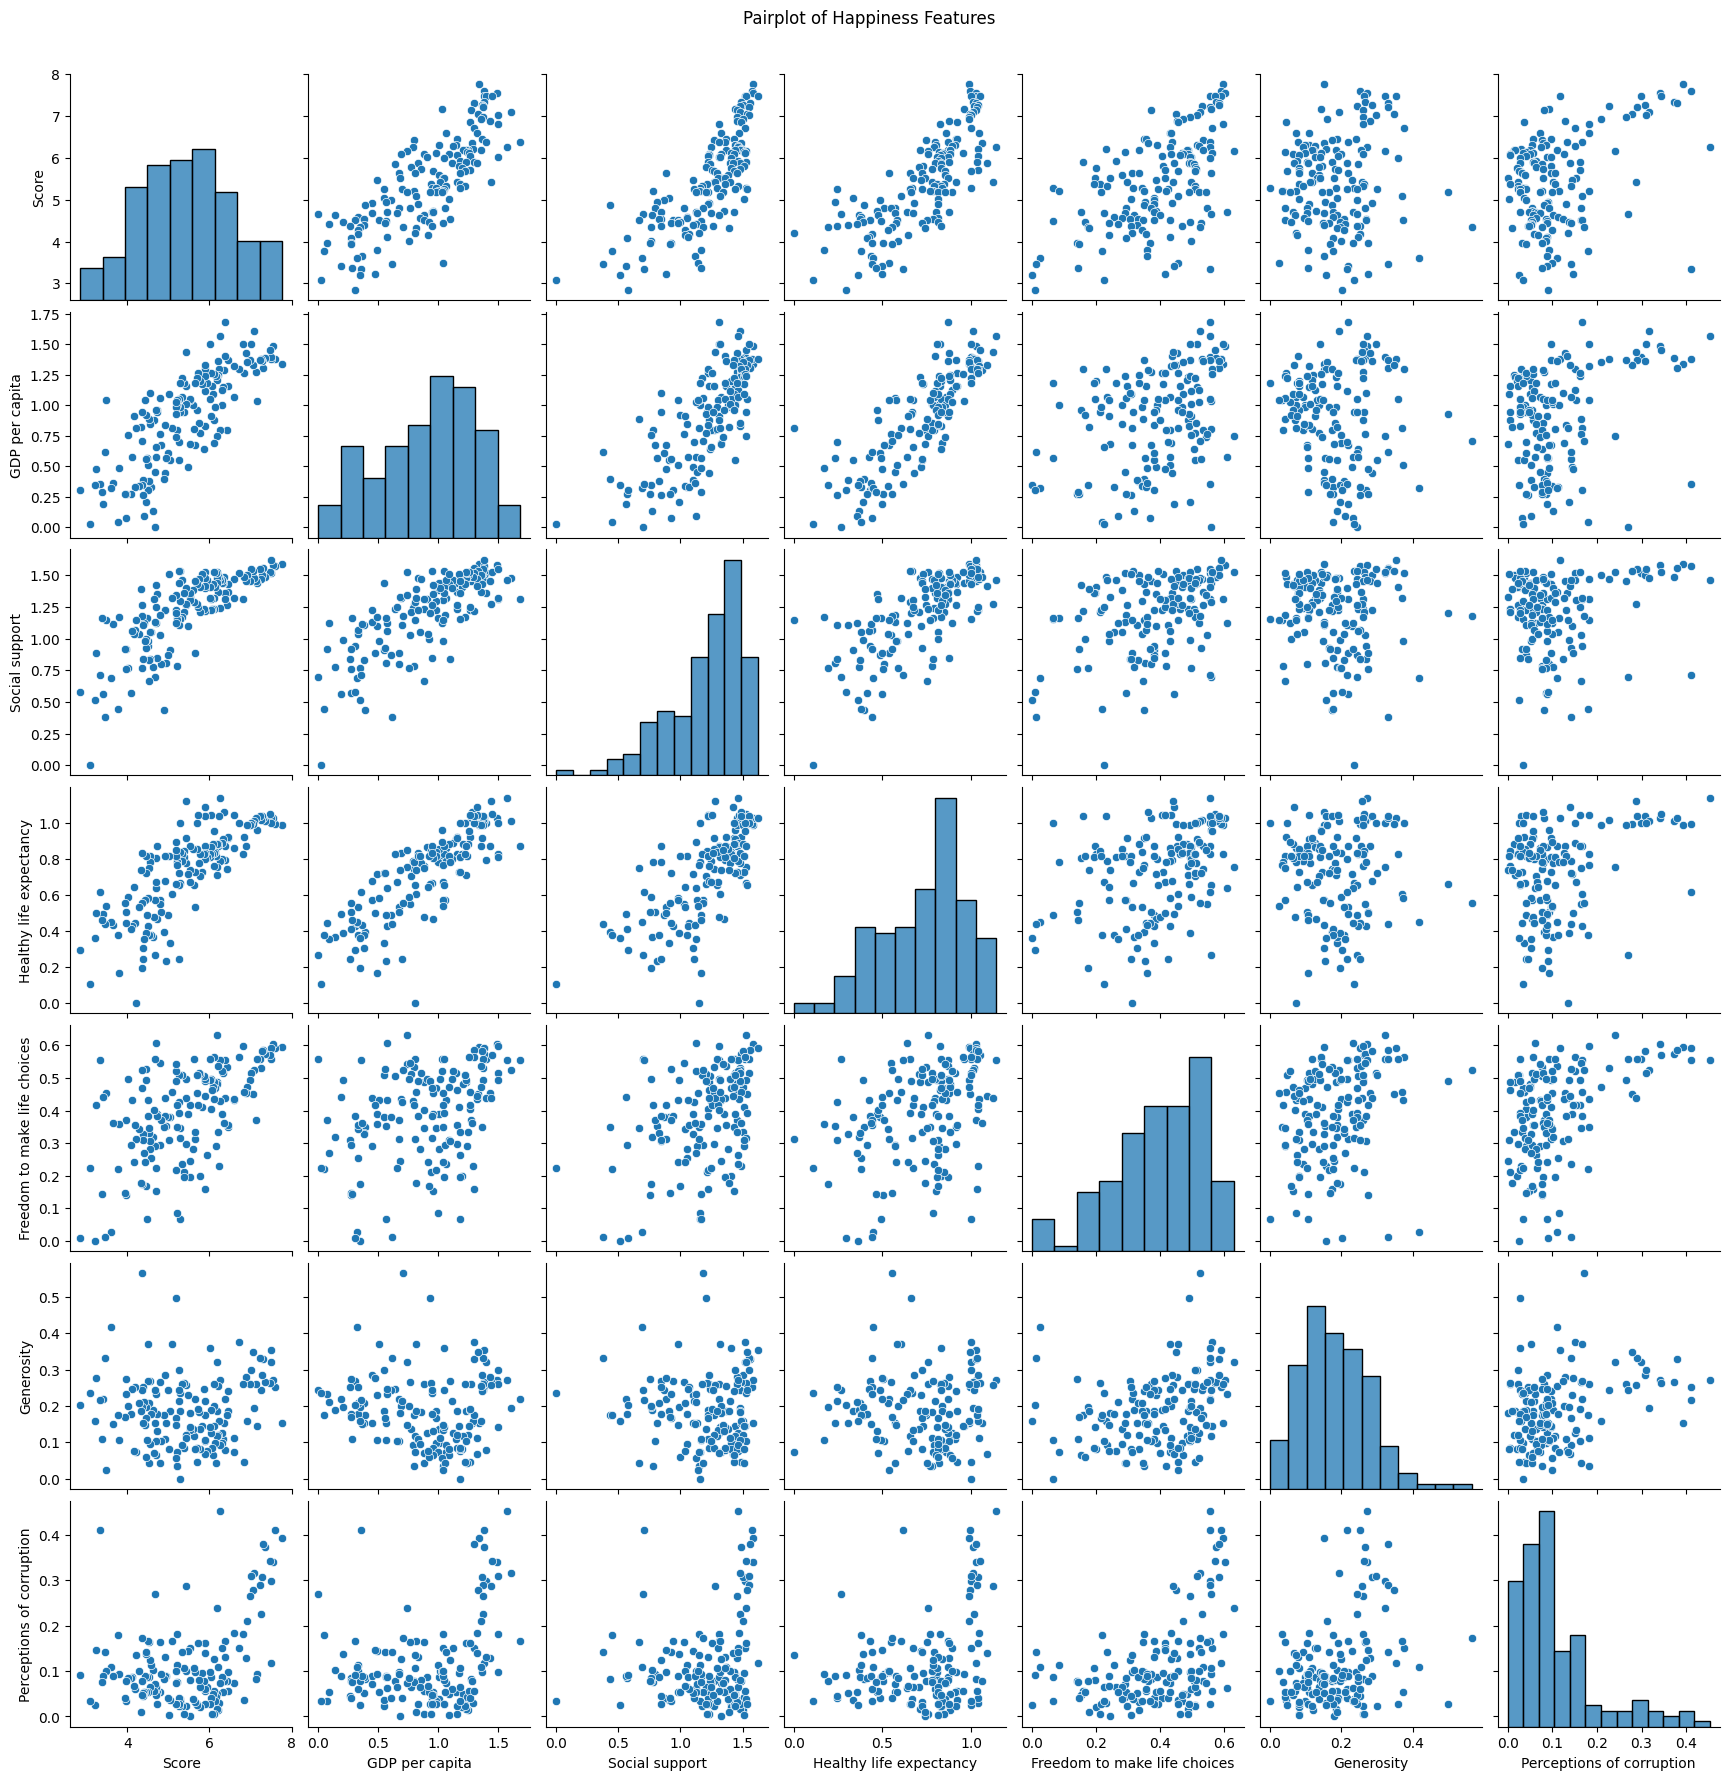

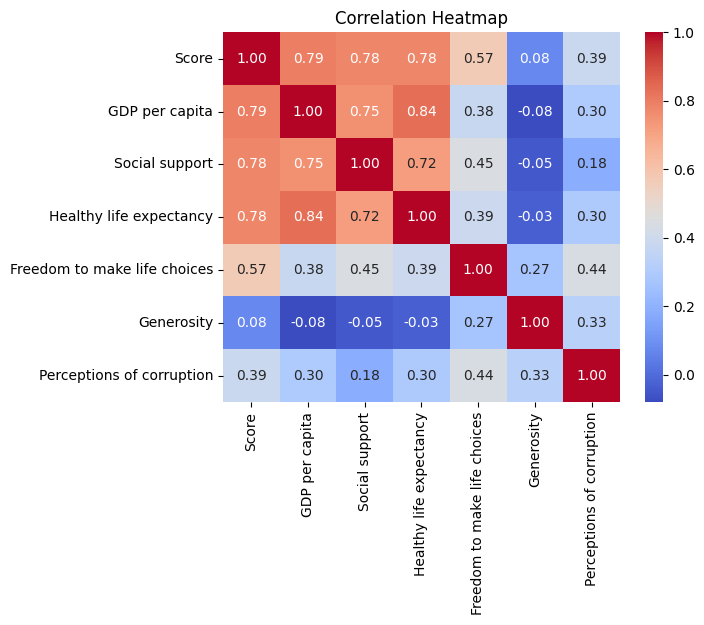

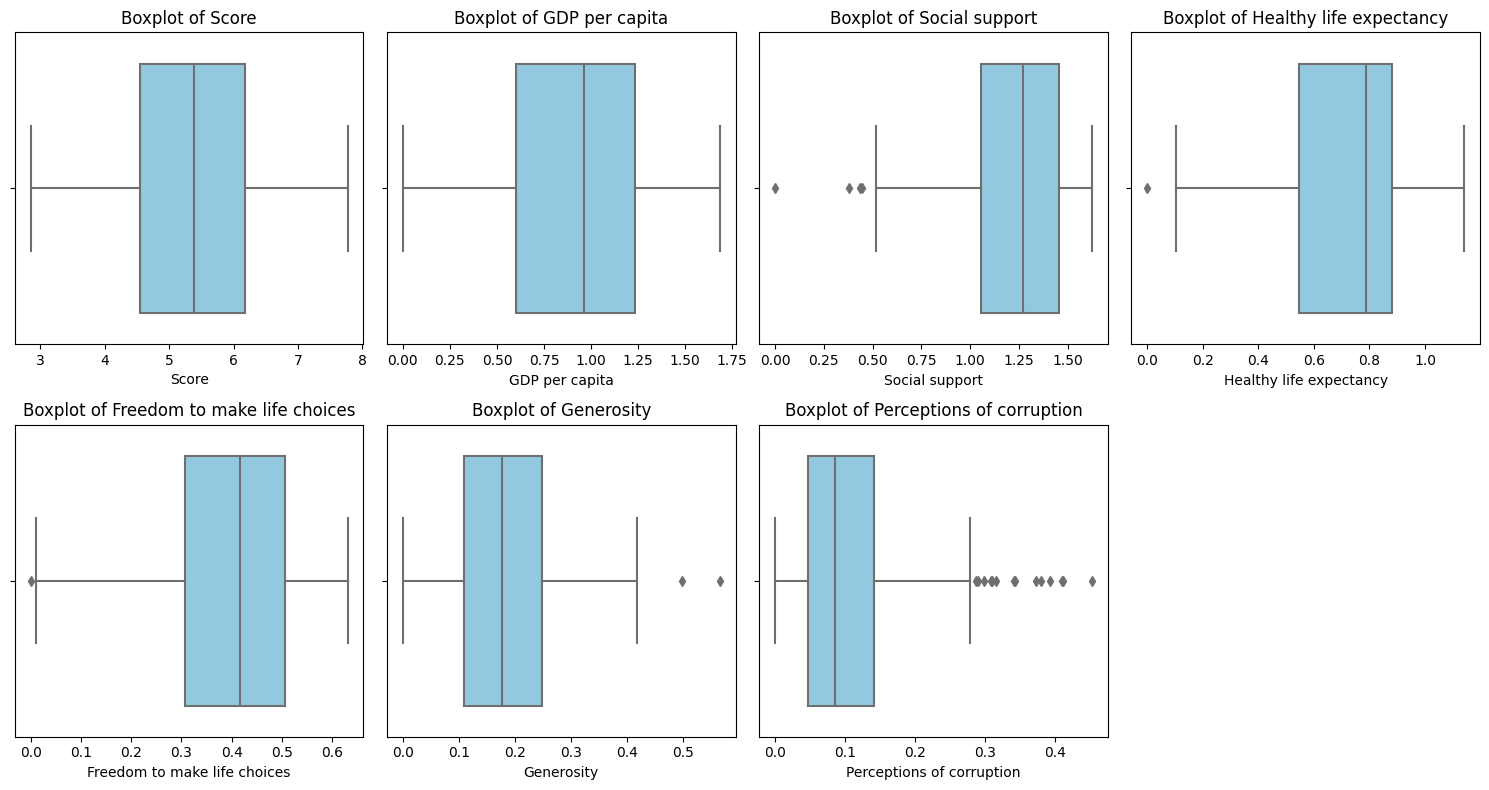

In [ ]:

features = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

subset_df = df[features]


summary_stats = subset_df.describe()


sns.pairplot(subset_df)
plt.suptitle("Pairplot of Happiness Features", y=1.02)
plt.show()

correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=feature, data=df, color='skyblue')
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df['GDP per capita'] = df['GDP per capita'].apply(lambda x: np.log1p(x))

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df[['GDP per capita', 'Healthy life expectancy']] = scaler.fit_transform(df[['GDP per capita', 'Healthy life expectancy']])

In [ ]:
df['Freedom * GDP per capita'] = df['Freedom to make life choices'] * df['GDP per capita']


In [ ]:
df['GDP^2'] = df['GDP per capita'] ** 2
df['Healthy^2'] = df['Healthy life expectancy'] ** 2

In [ ]:
from sklearn.model_selection import train_test_split

features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

target = 'Score'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (124, 6) (124,)
Testing set shape: (32, 6) (32,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")
    print()

# Evaluate each model
evaluate_model(y_test, linear_reg_pred, 'Linear Regression')
evaluate_model(y_test, decision_tree_pred, 'Decision Tree Regression')
evaluate_model(y_test, random_forest_pred, 'Random Forest Regression')

Metrics for Linear Regression:
Mean Squared Error: 0.4268
Mean Absolute Error: 0.5041
R-squared: 0.5899

Metrics for Decision Tree Regression:
Mean Squared Error: 0.5611
Mean Absolute Error: 0.5056
R-squared: 0.4609

Metrics for Random Forest Regression:
Mean Squared Error: 0.3969
Mean Absolute Error: 0.5040
R-squared: 0.6186



In [ ]:
X = df[features]
y = df[target]

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, but can be beneficial for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# If you want to inspect the model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print('\nModel Coefficients:\n', coefficients)

Mean Squared Error (MSE): 0.43
Mean Absolute Error (MAE): 0.50
R-squared (R2): 0.59

Model Coefficients:
                         Feature  Coefficient
0                GDP per capita     0.263633
1                Social support     0.383781
2       Healthy life expectancy     0.260588
3  Freedom to make life choices     0.223370
4                    Generosity     0.024567
5     Perceptions of corruption     0.128385


Mean Squared Error (MSE): 0.43
Mean Absolute Error (MAE): 0.50
R-squared (R2): 0.59


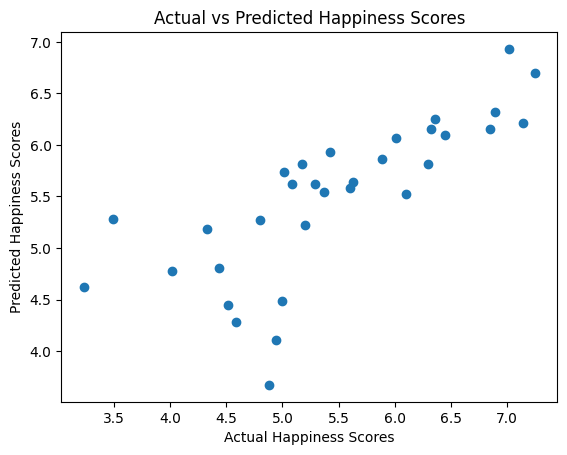

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Calculate accuracy (not applicable for regression, but can be used for classification)
accuracy = model.score(X_test_scaled, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Mean Squared Error: 0.4268046799491334
R-squared: 0.5898961335915672
Accuracy: 58.99%
